# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


 **Step 1:** get the data of desired firm from [yfinance](https://sg.finance.yahoo.com).

In [1]:
import yfinance as yf
data = yf.download('GOOGL','2006-01-01','2020-12-31') # from January 1, 2005 to June 30, 2017

[*********************100%***********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [2]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Open        High         Low       Close   Adj Close    Volume
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216


Open   --- mean : 595.1854611670892   	 Std:  404.659344519683   	 Max:  1820.5400390625   	 Min:  131.38638305664062
High   --- mean : 600.8108673338227   	 Std:  408.7066359298637   	 Max:  1843.8299560546875   	 Min:  134.81982421875
Low    --- mean : 589.2461429843523   	 Std:  400.8042003921636   	 Max:  1817.0   	 Min:  123.77377319335938
Close  --- mean : 595.1791107662782   	 Std:  404.9480276583226   	 Max:  1824.969970703125   	 Min:  128.84884643554688
Volume --- mean : 5555460.540397351   	 Std:  5995355.040941806   	 Max:  82151167   	 Min:  46560

**Step 2 :** Add item field

In [4]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item         Open        Close   Volume         High          Low
0     0  1765.000000  1736.250000  1051300  1767.760010  1728.000000
1     1  1787.229980  1757.760010   986300  1788.469971  1755.109985
2     2  1744.910034  1773.959961  1382500  1787.000000  1741.819946
3     3  1729.000000  1734.160034   465600  1742.410034  1724.349976
4     4  1723.930054  1728.229980  1148700  1744.109985  1721.199951
---
      Item        Open       Close    Volume        High         Low
3770  3770  233.438431  233.683685  25558216  236.936935  230.700699
3771  3771  228.663666  233.063065  35478286  235.485489  226.846848
3772  3772  223.223221  225.845840  21594983  226.001007  220.970978
3773  3773  222.172165  222.842850  30542227  224.704712  220.095093
3774  3774  211.471466  217.832840  26216158  218.053055  209.319321


**Step 3:** Visualise raw data.

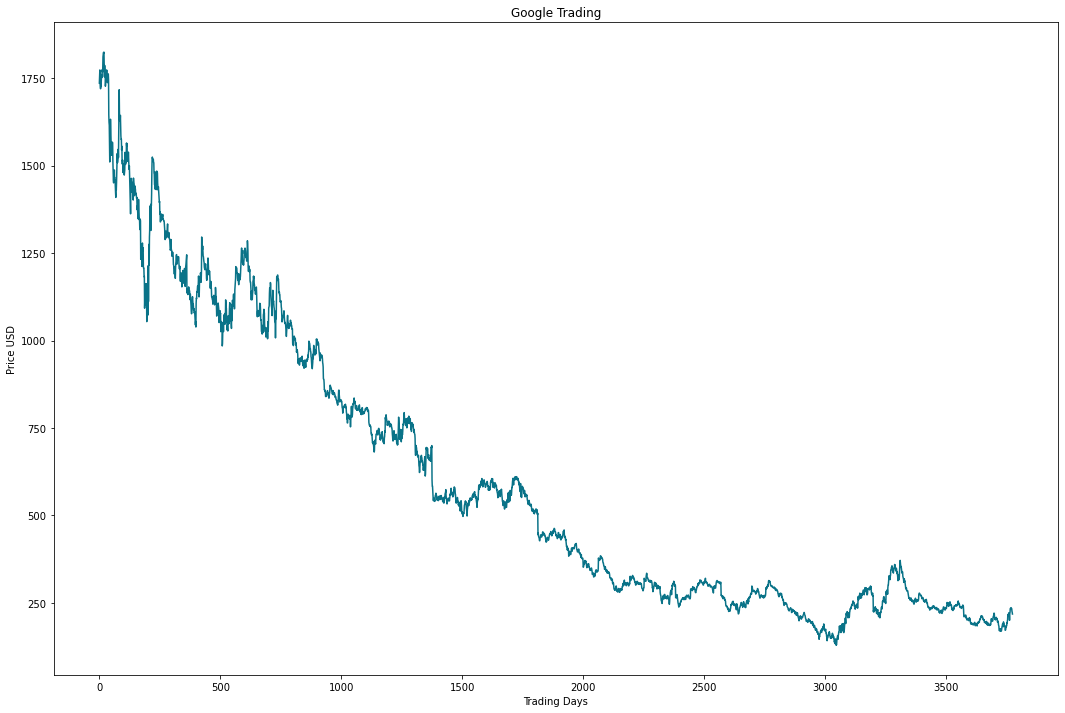

In [5]:
import visualize

visualize.plot_basic(stocks)

**Step 4 :** Add more features

In [6]:
import technical_indicators as ti

In [7]:
stocks = ti.calTechnicalIndicator(stocks)

3750


In [8]:
# Check for highly-correlated features
stocks.columns
corrMatrix = stocks.corr()
corrMatrix

,Item,Open,Close,Volume,High,Low,PCT_CHANGE,MACD,SMA,EMA,TR,ATR,MA,BB_UP,BB_DOWN,BB_RANGE,RSI,ADX
Item,1.000000,-0.927266,-0.927242,0.674614,-0.926890,-0.927609,0.013556,-0.928276,0.033548,0.032700,-0.607146,-0.717927,-0.928115,-0.926204,-0.929264,-0.490747,0.076379,0.094922
Open,-0.927266,1.000000,0.999722,-0.528806,0.999880,0.999835,0.001580,0.999055,0.002065,0.002267,0.685924,0.830643,0.998631,0.998375,0.997991,0.578477,-0.012792,-0.125446
Close,-0.927242,0.999722,1.000000,-0.529364,0.999853,0.999869,0.002847,0.999266,0.002520,0.003357,0.684884,0.830221,0.998835,0.998566,0.998207,0.578240,-0.012141,-0.125235
Volume,0.674614,-0.528806,-0.529364,1.000000,-0.526807,-0.531759,0.023211,-0.530914,0.078001,0.070664,-0.233390,-0.316916,-0.531092,-0.528017,-0.533816,-0.225286,0.122726,-0.020623
High,-0.926890,0.999880,0.999853,-0.526807,1.000000,0.999791,0.001905,0.999149,0.002649,0.003017,0.689841,0.833541,0.998720,0.998504,0.998037,0.579670,-0.012218,-0.125459
Low,-0.927609,0.999835,0.999869,-0.531759,0.999791,1.000000,0.001143,0.999210,0.001500,0.001775,0.680622,0.827101,0.998788,0.998464,0.998218,0.576658,-0.013036,-0.125376
PCT_CHANGE,0.013556,0.001580,0.002847,0.023211,0.001905,0.001143,1.000000,-0.015641,0.443799,0.745897,0.080675,0.035669,-0.017742,-0.016835,-0.018672,0.015014,0.323359,-0.025056
MACD,-0.928276,0.999055,0.999266,-0.530914,0.999149,0.999210,-0.015641,1.000000,-0.024515,-0.025574,0.680658,0.824517,0.999920,0.999513,0.999436,0.575000,-0.036303,-0.121272
SMA,0.033548,0.002065,0.002520,0.078001,0.002649,0.001500,0.443799,-0.024515,1.000000,0.863346,0.075766,0.085867,-0.032561,-0.031110,-0.034043,0.021550,0.649946,-0.105486
EMA,0.032700,0.002267,0.003357,0.070664,0.003017,0.001775,0.745897,-0.025574,0.863346,1.000000,0.092490,0.084358,-0.032146,-0.030538,-0.033794,0.026216,0.650677,-0.099601


In [9]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
to_drop = [column for column in to_drop if (column != 'Close' and column != 'High' and column != 'Low')]
to_drop

['MACD', 'MA', 'BB_UP', 'BB_DOWN']

In [10]:
stocks.drop(columns=to_drop, inplace=True)
to_keep = stocks.columns

**Step 7:** Log the normalised data for future resuablilty

In [11]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume,High,Low,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,52,1544.500000,1555.469971,1560500,1571.400024,1541.130005,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,53,1574.599976,1563.439941,1658700,1583.849976,1545.900024,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,54,1577.010010,1567.069946,1953600,1585.160034,1558.630005,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,55,1538.000000,1564.589966,2767200,1588.420044,1529.300049,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,56,1492.859985,1510.449951,1648300,1511.849976,1487.000000,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


**Step 2:** Split data into train and test pair

In [13]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2551, 1)
y_train (2551, 1)
x_test (1172, 1)
y_test (1172, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [14]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [15]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

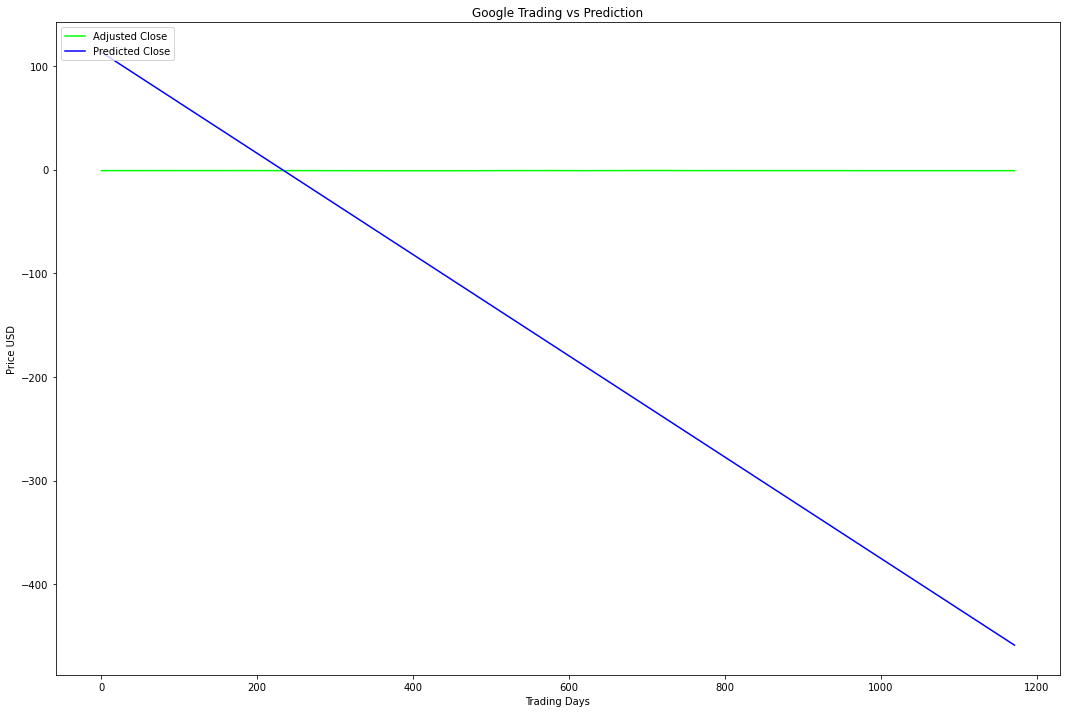

In [16]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [17]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7381 MSE (0.8591 RMSE)
Test Score: 56869.24958284 MSE (238.47274390 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [18]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume,High,Low,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,1544.500000,1555.469971,1560500,1571.400024,1541.130005,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,1574.599976,1563.439941,1658700,1583.849976,1545.900024,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,1577.010010,1567.069946,1953600,1585.160034,1558.630005,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,1538.000000,1564.589966,2767200,1588.420044,1529.300049,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,1492.859985,1510.449951,1648300,1511.849976,1487.000000,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [19]:
X_train, X_test,y_train, y_test, y_test_close_base, y_test_close_actual = sd.train_test_split_lstm(stocks_data) 

## change from 5 to 1
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

X_train[:2], y_train[:2], X_test[:2], y_test[:2]

x_train (3221, 13)
y_train (3221,)
x_test (500, 13)
y_test (500,)


(array([[ 1.54450000e+03,  1.55546997e+03,  1.56050000e+06,
          1.57140002e+03,  1.54113000e+03, -7.80122527e-03,
         -6.32534412e-03, -2.01153621e-03,  2.00499268e+01,
          4.57304871e+01,  1.46182554e+02,  3.94214677e+01,
          2.10064575e+01],
        [ 1.57459998e+03,  1.56343994e+03,  1.65870000e+06,
          1.58384998e+03,  1.54590002e+03,  5.12383450e-03,
         -2.72753208e-03,  3.66920695e-04,  3.02700195e+01,
          4.58934875e+01,  1.23826640e+02,  4.07464838e+01,
          2.11852328e+01]]),
 array([0.00512383, 0.00232181]),
 array([[ 3.52817810e+02,  3.51616608e+02,  5.12027500e+06,
          3.54329315e+02,  3.48618622e+02,  1.59801787e-02,
          1.60025867e-02,  1.32199884e-02,  5.96093750e+00,
          1.19151642e+01,  4.22798677e+01,  7.60092558e+01,
          3.16996242e+01],
        [ 3.53888885e+02,  3.50720734e+02,  5.87911500e+06,
          3.58358368e+02,  3.50720734e+02, -2.54787176e-03,
          1.31056443e-02,  7.96403499e-03, 

**Step 3 :** Normalise the data

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc_X = MinMaxScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = MinMaxScaler()
y_train = np.squeeze(sc_Y.fit_transform(y_train.reshape(-1, 1)))
y_test = np.squeeze(sc_Y.transform(y_test.reshape(-1, 1)))

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [22]:
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
y_test_close_base = y_test_close_base[-X_test.shape[0]:]
y_test_close_actual = y_test_close_actual[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print("y_test_close_base", y_test_close_base.shape)
print("y_test_close_actual", y_test_close_actual.shape)


x_train (3171, 50, 13)
y_train (3171,)
x_test (450, 50, 13)
y_test (450,)
y_test_close_base (450,)
y_test_close_actual (450,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [23]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0068607330322265625


**Step 4:** Train the model

In [24]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

95/95 [==============================] - 25s 73ms/step - loss: 0.0374 - val_loss: 0.0095


**Step 5:** make prediction using test data

In [25]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

In [26]:
import matplotlib.pyplot as plt

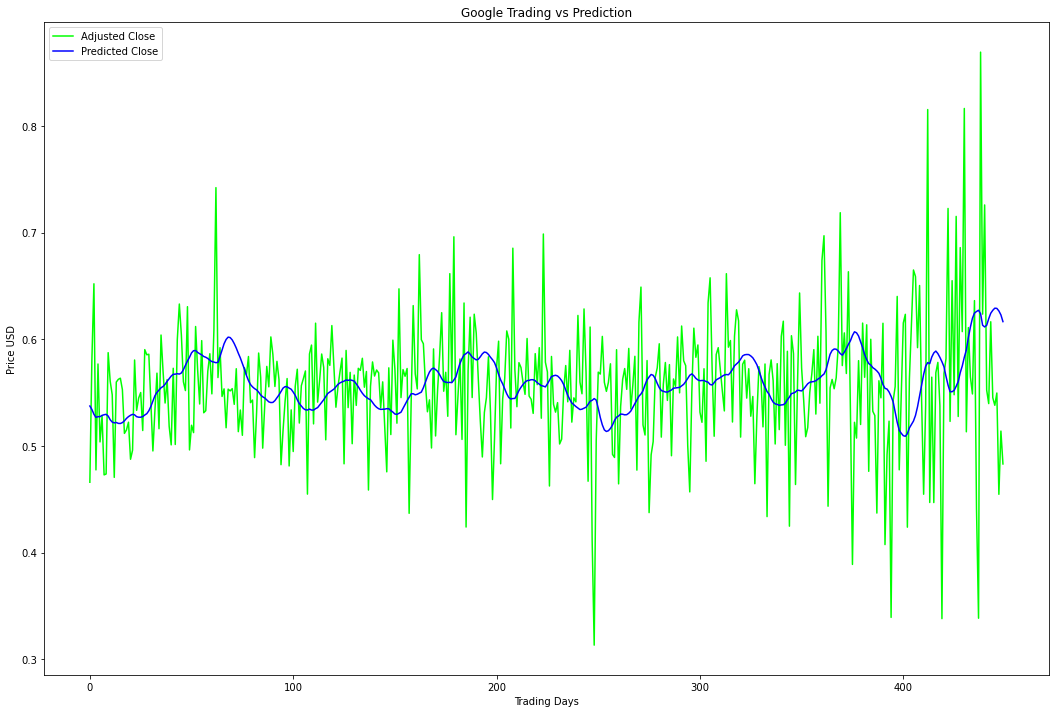

In [27]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 7:** Recover the close price

In [28]:
y_test.size, predictions.size

(450, 450)

In [29]:
predictions = sc_Y.inverse_transform(predictions)
flatten_prediction = (predictions + 1).flatten()

In [30]:
flatten_prediction.size, y_test_close_base.size

(450, 450)

In [31]:
predicted_close = np.multiply(flatten_prediction,  y_test_close_base)

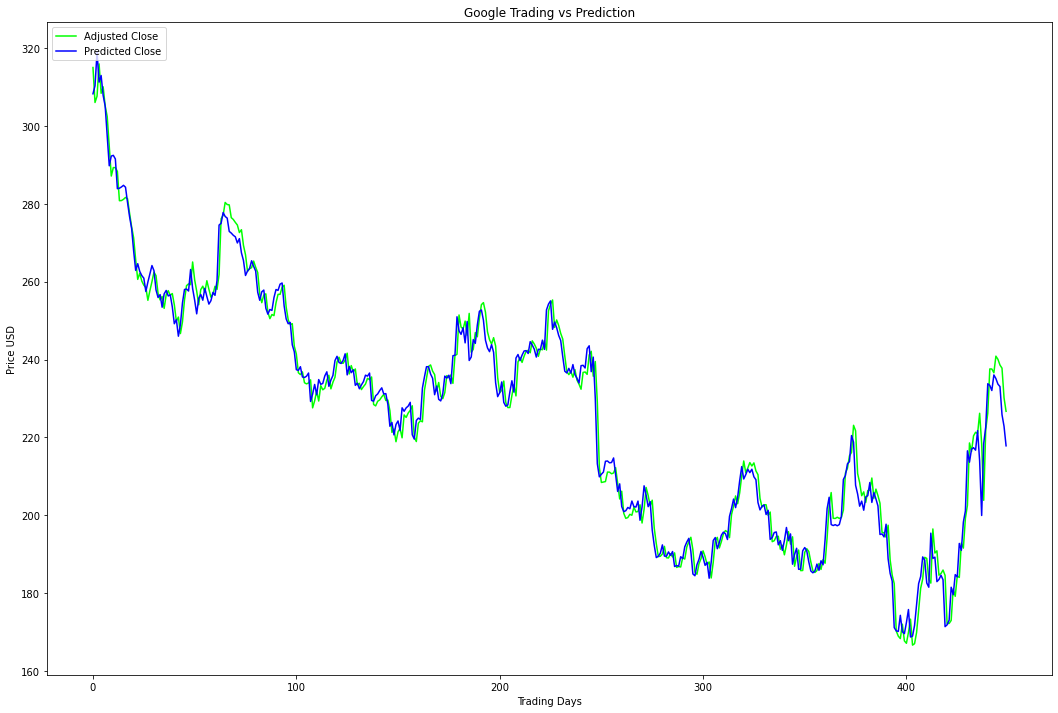

In [32]:
vs.plot_lstm_prediction(predicted_close, y_test_close_actual)

In [33]:
print(predicted_close.size)
print(predicted_close)


450
[315.06139347 306.07045254 307.69867584 315.99344378 308.43038591
 310.10325462 305.15440779 302.45153186 294.76108472 287.16953196
 289.33923234 289.33587414 288.35818623 280.8259866  280.86818129
 281.18692334 281.67234641 281.33158876 277.59338982 274.13126444
 271.26919644 265.59332425 260.6085386  262.18635675 260.17951575
 259.1211913  258.51574768 255.22988503 257.74374591 260.02447914
 262.47004235 261.55550706 257.0014533  255.32223733 256.2257574
 253.15345058 256.67204875 257.70712854 256.5054908  256.97153973
 254.08541176 249.84858998 250.92372961 246.68048528 249.6788306
 255.30149892 259.00310596 259.45276903 259.24904398 265.07958661
 260.47885686 257.59598422 254.07014594 257.97981208 258.86233802
 257.29750816 260.26152671 258.08063857 256.03187727 256.7938158
 258.83311039 258.04679318 261.83209662 276.19488276 277.09969324
 280.37769242 279.84555714 279.7564963  276.47571167 276.00557052
 275.25517317 274.57759652 272.64118594 273.37987836 269.34462577
 266.9460

**Step 7:** Get the test score.

In [34]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00423977 MSE (0.06511354 RMSE)
Test Score: 0.00422259 MSE (0.06498149 RMSE)


### Improved LSTM Model

**Step 1:** Build an improved LSTM model

In [35]:
# Set up hyperparameters
batch_size = 100
epochs = 10

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.002251148223876953


**Step 2:** Train improved LSTM model

In [36]:
history = model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.15
         )

Epoch 1/10
27/27 - 9s - loss: 0.0319 - val_loss: 0.0125
Epoch 2/10
27/27 - 2s - loss: 0.0066 - val_loss: 0.0121
Epoch 3/10
27/27 - 2s - loss: 0.0054 - val_loss: 0.0115
Epoch 4/10
27/27 - 2s - loss: 0.0052 - val_loss: 0.0101
Epoch 5/10
27/27 - 2s - loss: 0.0048 - val_loss: 0.0100
Epoch 6/10
27/27 - 2s - loss: 0.0045 - val_loss: 0.0101
Epoch 7/10
27/27 - 2s - loss: 0.0045 - val_loss: 0.0096
Epoch 8/10
27/27 - 2s - loss: 0.0043 - val_loss: 0.0096
Epoch 9/10
27/27 - 2s - loss: 0.0042 - val_loss: 0.0096
Epoch 10/10
27/27 - 2s - loss: 0.0040 - val_loss: 0.0094


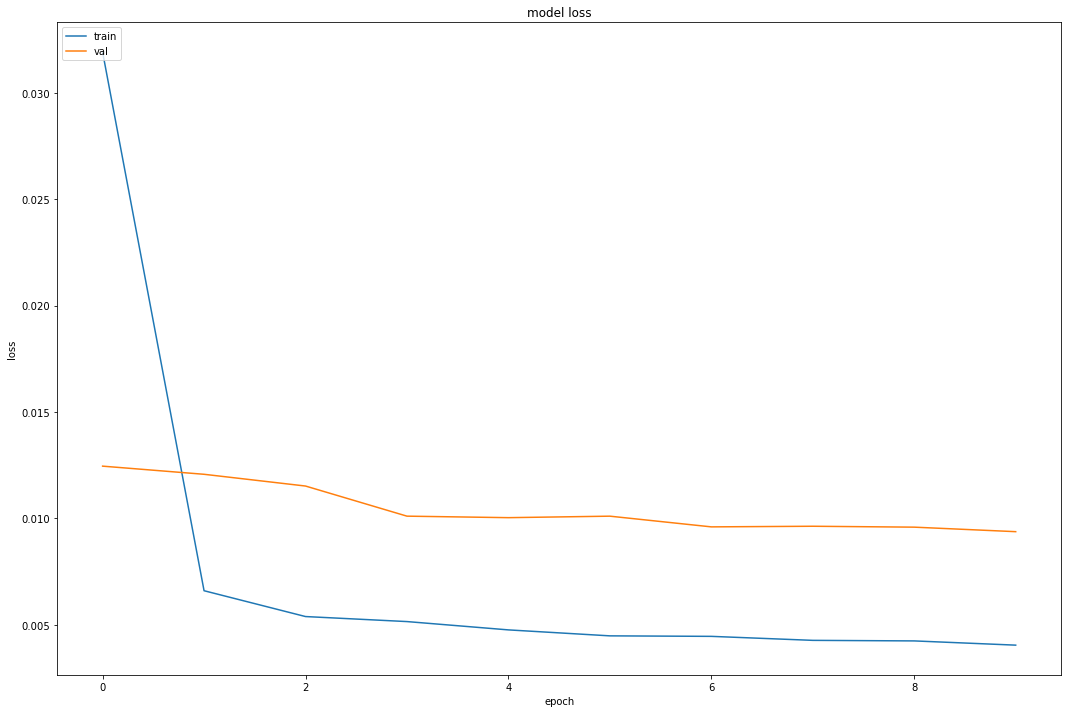

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Step 3:** Make prediction on improved LSTM model

In [38]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

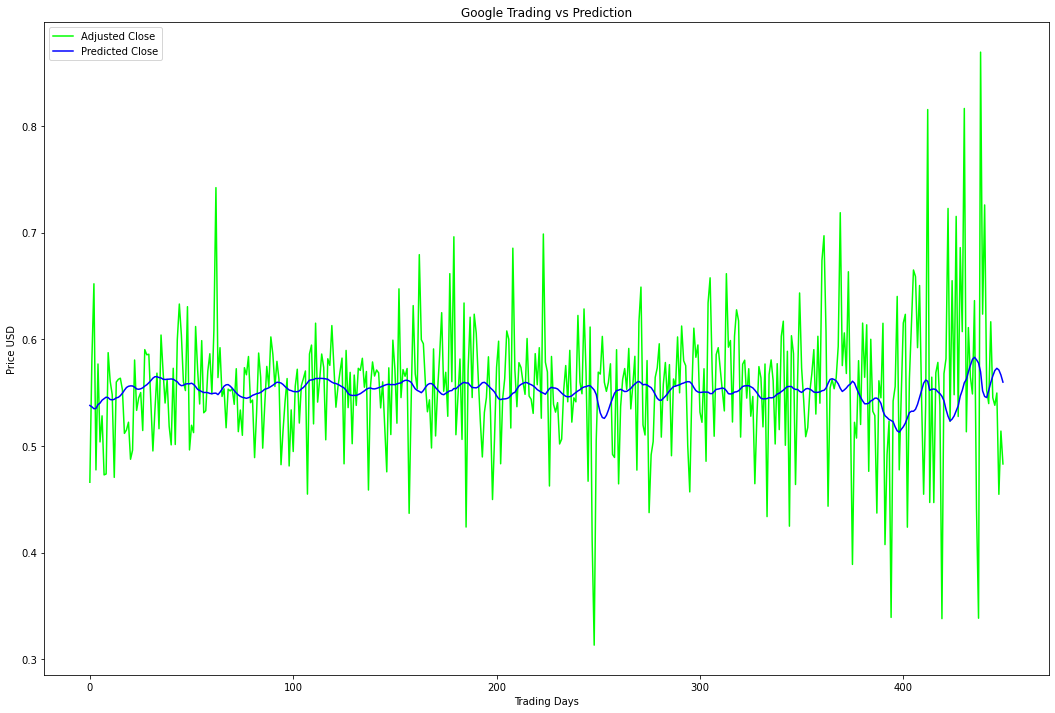

In [39]:
vs.plot_lstm_prediction(y_test,predictions)

In [40]:
predictions = sc_Y.inverse_transform(predictions)
flatten_prediction = (predictions + 1).flatten()
predicted_close = np.multiply(flatten_prediction,  y_test_close_base)

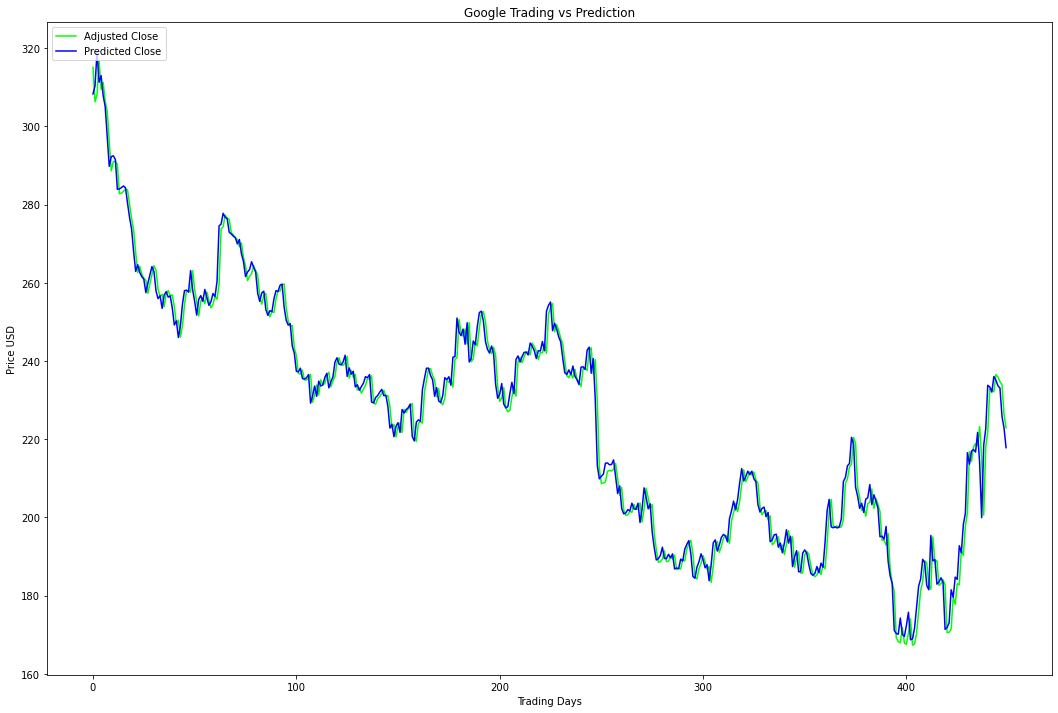

In [41]:
vs.plot_lstm_prediction(predicted_close, y_test_close_actual)

**Step 5:** Get the test score

In [42]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00398768 MSE (0.06314806 RMSE)
Test Score: 0.00388451 MSE (0.06232586 RMSE)


In [43]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 6.170708 - RMSE * Adjusted Close Range


**Step 6:** Save the model

In [44]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [45]:
size = predicted_close.size
print(size)
test = stocks_data.iloc[-size:,:]
test['Predicted_close'] = predicted_close

450


<ipython-input-45-e5f2b18bf283>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_close'] = predicted_close


In [52]:
test.to_csv("google_test.csv")
test.head()

,Open,Close,Volume,High,Low,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX,Predicted_close
3273,309.554565,308.308319,12038549,313.273285,306.301300,-0.027594,-0.018279,-0.016103,6.211212,10.113110,36.529443,33.365499,19.162823,315.110944
3274,319.554565,310.365356,13873712,320.250244,308.083069,0.006672,-0.009540,-0.008511,6.971985,9.739737,39.975867,35.100520,19.508637,306.300362
3275,312.302307,319.014008,13633753,319.519531,309.429443,0.027866,-0.002110,0.003614,12.167175,9.254002,40.567071,41.944938,19.829750,308.177343
3276,317.137146,311.311310,23574402,321.026031,304.804810,-0.024145,-0.005360,-0.005639,10.090088,9.241240,39.423882,38.091869,20.500925,316.789153
3277,310.990997,313.007996,10760429,313.153168,308.708710,0.005450,-0.002350,-0.001943,16.221222,8.608107,37.664738,39.412119,21.124158,309.472765


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

[*********************100%***********************]  1 of 1 completed


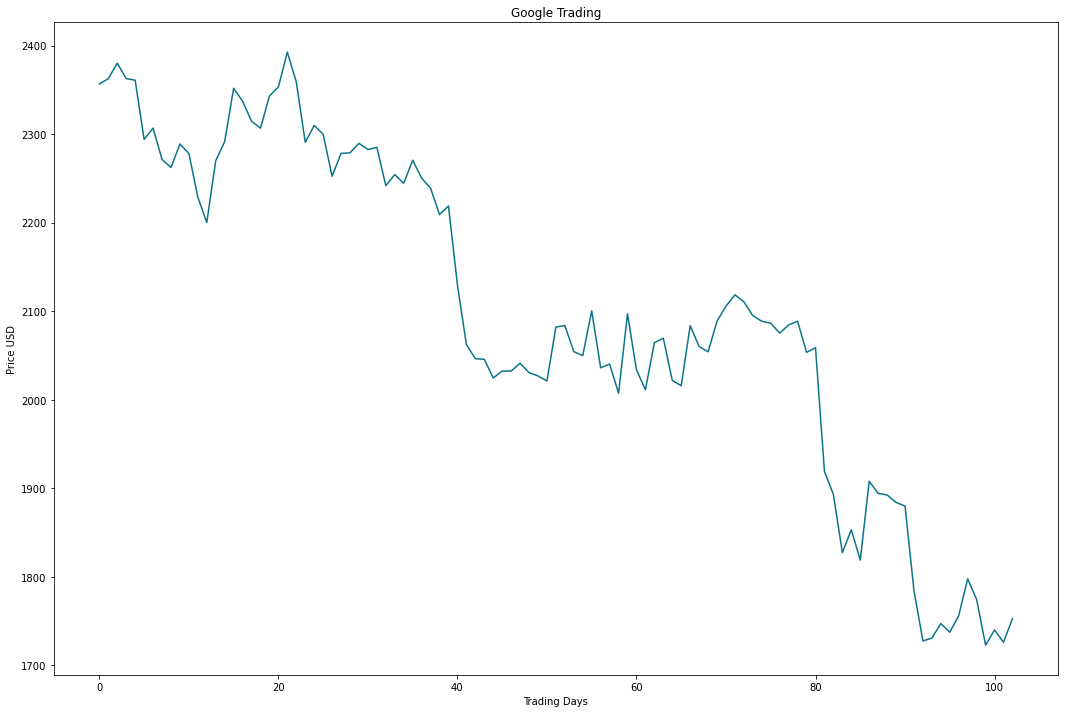

In [47]:
import preprocess_data as ppd

new_data = yf.download('GOOGL','2021-01-01','2021-05-31') # from January 1, 2021 to May 31, 2021
new_data = ppd.remove_data(new_data)

visualize.plot_basic(new_data)

In [48]:
stocks = ppd.remove_data(new_data)

stocks = ti.calTechnicalIndicator(stocks)

stocks = stocks[to_keep]

stocks = stocks.drop(['Item'], axis = 1)

#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['PCT_CHANGE'].values
base_price = stocks[:]['Close'].values[:-1]
aim_price = stocks[:]['Close'].values[1:]

X = sc_X.fit_transform(X)

Y = np.squeeze(sc_Y.fit_transform(Y.reshape(-1, 1)))

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]
print(X.shape)
print(Y.shape)
print(Y)
print(base_price.shape)
print(aim_price.shape)
base_price, aim_price 

78
           Open        Close   Volume         High          Low  PCT_CHANGE  \
52  2048.179932  2021.339966  1585000  2068.750000  2019.180054   -0.029238   
53  2029.729980  2026.959961  2303600  2037.040039  2002.930054    0.002780   
54  2027.630005  2030.689941  1676800  2048.340088  2014.000000    0.001840   
55  2039.949951  2041.329956  1425500  2064.110107  2028.000000    0.005240   
56  2051.760010  2032.530029  1260900  2067.600098  2029.000000   -0.004311   

         SMA       EMA         TR        ATR   BB_RANGE        RSI        ADX  
52 -0.007520 -0.007830  54.880005  54.804504  22.319684  44.303997  19.600996  
53 -0.002152 -0.004293  49.569946  55.850006  22.249038  45.102532  19.166076  
54 -0.002217 -0.002249  34.109985  55.797998  22.019586  45.659396  18.450913  
55 -0.004036  0.000247  34.340088  55.898499  20.576332  47.301557  17.361471  
56 -0.004738 -0.001272  36.110107  53.590503  12.968709  46.061753  16.255230  
(50, 1, 13)
(50,)
[0.46172371 0.44877855 0

(array([2021.33996582, 2026.95996094, 2030.68994141, 2041.32995605,
        2032.5300293 , 2032.45996094, 2024.72998047, 2045.79003906,
        2046.4699707 , 2062.52001953, 2129.7800293 , 2218.95996094,
        2209.26000977, 2239.0300293 , 2250.42993164, 2270.66992188,
        2244.62011719, 2254.42993164, 2241.90991211, 2285.25      ,
        2282.75      , 2289.76000977, 2279.01000977, 2278.35009766,
        2252.52001953, 2299.92993164, 2309.92993164, 2290.97998047,
        2359.04003906, 2392.76000977, 2353.5       , 2343.08007812,
        2306.83007812, 2314.77001953, 2337.35009766, 2351.92993164,
        2291.75      , 2270.06005859, 2200.25      , 2229.04003906,
        2278.37988281, 2288.91992188, 2262.4699707 , 2271.5       ,
        2306.94995117, 2294.12988281, 2361.04003906, 2362.87011719,
        2380.31005859, 2362.67993164]),
 array([2026.95996094, 2030.68994141, 2041.32995605, 2032.5300293 ,
        2032.45996094, 2024.72998047, 2045.79003906, 2046.4699707 ,
        

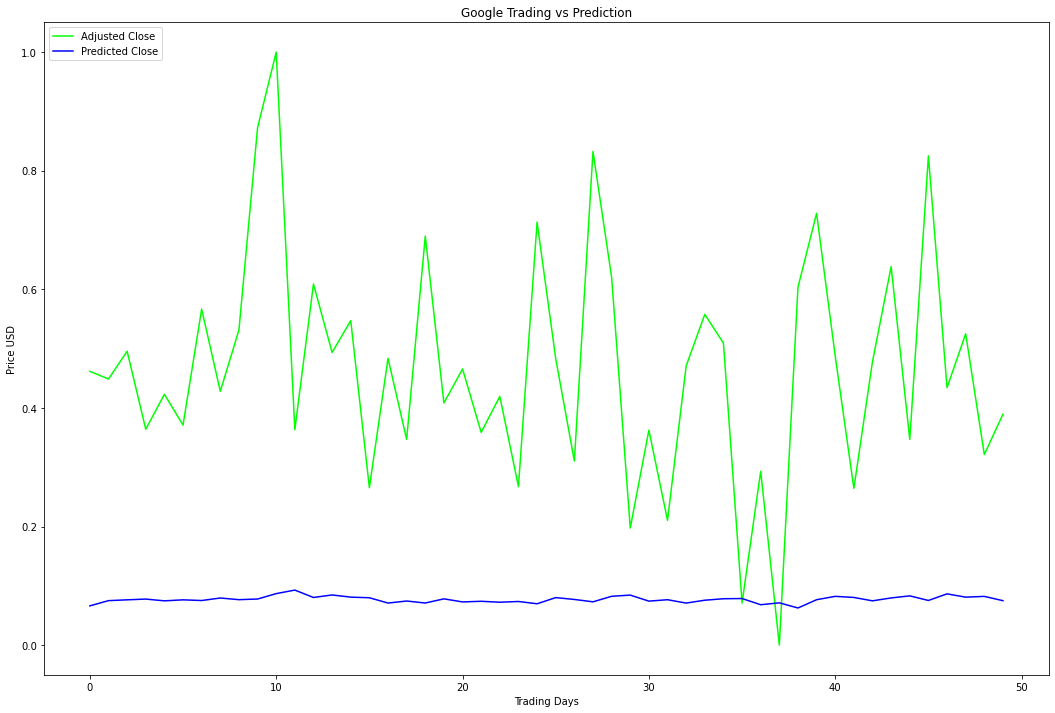

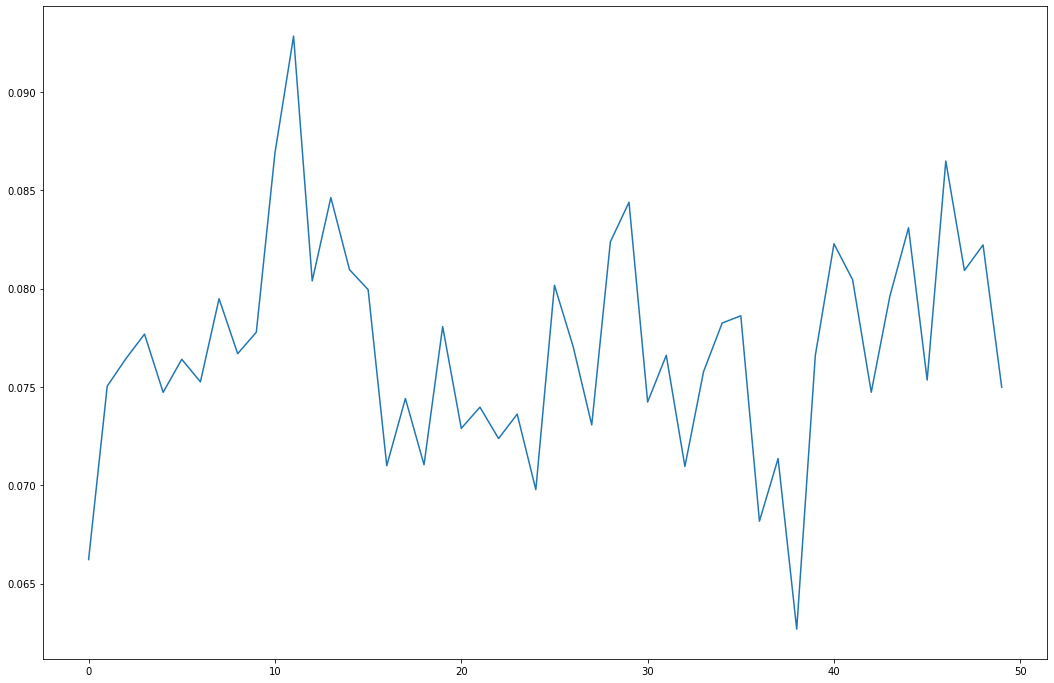

In [49]:
# Generate predictions 
predictions = model.predict(X)
vs.plot_lstm_prediction(Y, predictions)
plt.plot(predictions)

In [50]:
# Calculate predicted price
predictions = sc_Y.inverse_transform(predictions)
print(predictions[:5])
flatten_prediction = (predictions + 1).flatten()
predicted_close = np.multiply(flatten_prediction, base_price)
print(predicted_close[:5])

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

[[-0.02594332]
 [-0.02530269]
 [-0.02520144]
 [-0.02511068]
 [-0.02532565]]
[1968.89965811 1975.67238462 1979.51363098 1990.07080953 1981.05487309]
Test Score: 0.1888 MSE (0.4345 RMSE)


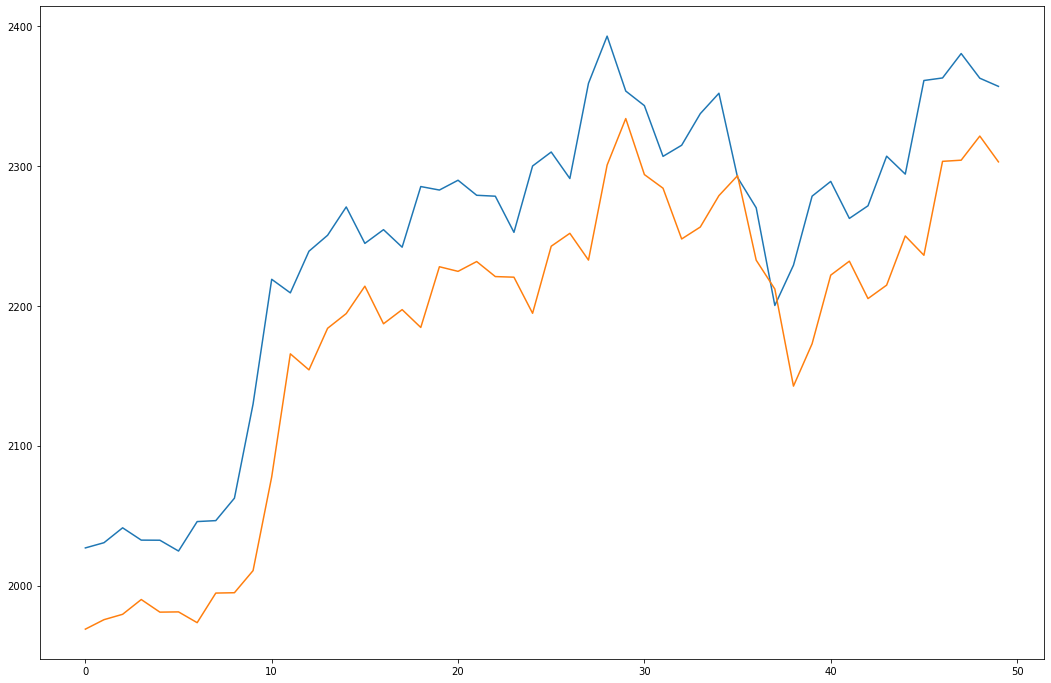

In [51]:
plt.plot(aim_price)
plt.plot(predicted_close)